## Homework 10

Carlos Lizama
N17866309

In this homework I replicate figure 9a of the paper *Globalization and Synchronization of Innovation Cycles* by Matsuyama, Sushko and Gardini.

The model is a two contries $(j,k)$ economy. In each contry the representative household supply labor inelastically. Contries are identical although they might differ in size, ie labor supply might be larger in one (in the version simulated in this homework both countries are of the same size). Households consume a nontradable final good, competitively produced,  which is a composite of homogeneous good and composite of differenciated goods which could be supplied either in monopolistic markets, when and innovator creates a new variaty has a monopoly for one period, or in competitive markets for old variaties. The differenciated intermediate goods are produced in both contries.

There is a cost of suppying one unit of intermediate good to the other contry $\tau$. Define $\rho$, as the measure of how much the imported good is spent on an importad variety, $\rho = (\tau)^{1-\sigma}$, where $\sigma$ is the elasticity of subsitution among intermediate goods. $\rho$ is the measure of globalization in the economy.

Let $p_{jt}^c$ and $p_{jt}^c$ the price and output for a competitively produced variety in country $j$ at time $t$ and Let $p_{jt}^m$ and $p_{jt}^m$ the price and output for the monopolistically produced variaties. It can be show that $\frac{p_{jt}^c y_{jt}^c}{p_{jt}^m y_{jt}^m} = \left( 1 - \frac{1}{\sigma} \right)^{1-\sigma} \equiv \theta \in (1, e)$. The competitive variaties are cheaper and produced and sold more than their monopolistically produced counterparts.

Denote $N_{jt}^c$ and $N_{jt}^m$ the measure of competitive and monopolistically competitive supplied intermediate inputs. Denote also $M_{jt}$ as the effective input variaties produced in $j$ available to the final producer $M_{jt} = N_{jt}^c + N_{jt}^m/\theta$.

A new variaty is introduced by using $f$ units of labor. The complementary slackness condition reads $\pi_{jt}^m \leq 0;  N_{jt}^m \geq 0$, equivalently $\pi_{jt}^m N_{jt}^m = 0$. Hence, if there is innovation then profits are zero or profits are negative and there is no innovation. After doing some algebra these conditions boil down to $N_{jt}^m \geq 0$ and $\frac{1}{\sigma} \left[ \frac{\alpha L_j}{\theta (M_{jt}) + \rho M_{kt}} + \frac{\alpha L_k}{\theta (M_{jt}) + \rho M_{kt}} \right] \leq f$.

Old varieties get obsolete with probability $\delta$ each period, hence $N_{jt+1}^c = \delta (N_{jt}^c + N_{jt}^m) = \delta(N_{jt}^c + \theta(M_{jt} - N_{jt}^c))$.

Finally, normalizing measures $n_{jt} \equiv \frac{\theta \sigma f N_{jt}^c}{\alpha(L_1 + L_2)}; i_{jt} \equiv \frac{\theta \sigma f N_{jt}^m}{\alpha(L_1 + L_2)}; m_{jt} \equiv \frac{\theta \sigma f M_{jt}}{\alpha(L_1 + L_2)}$, and $L_j = L_k$, we obtain that the dynamics of the 2D sytem is summarized by the following equation:

\begin{equation}
\left\{
\begin{array}{lll}
n_{1t+1} = & \delta ( \theta/2 + (1-\theta)n_{1t} ) & \text{for } n_{t} \in D_{LL} \equiv \{ (n_1, n_2) \} \in \mathbb{R}_{+}^2  | n_j \leq \frac{1}{2} \} \\ 
n_{2t+1} = & \delta ( \theta/2 + (1-\theta)n_{2t} ) &  \\ 
n_{1t+1} = & \delta n_{1t} & \text{for } n_{t} \in D_{HH} \equiv \{ (n_1, n_2) \} \in \mathbb{R}_{+}^2  | n_j \geq h(n_k) \} \\ 
n_{2t+1} = & \delta n_{2t} & \\ 
n_{1t+1} =& \delta n_{1t} & \text{for } n_t \in D_{HL} \equiv \{ (n_1,n_2) \in \mathbb{R}_{+}^2 | n_1 \geq \frac{1}{2}; n_2 \leq h(n_1) \} \\
n_{2t+1} = &  \delta (\theta h(n_{1t}) + (1-\theta)n_{2t}) \\
n_{1t+1} = &  \delta (\theta h(n_{2t}) + (1-\theta)n_{1t}) & \text{for } n_t \in D_{LH} \equiv \{ (n_1,n_2) \in \mathbb{R}_{+}^2 | n_1 \leq h(n_2); n_2 \geq \frac{1}{2} \} \\
n_{2t+1} =& \delta n_{2t} &  \\
\end{array} 
\right.
\end{equation}

where $h(n)$ is defined implicitly by $\frac{1}{h(n) + \rho n} + \frac{1}{h(n) + n/\rho} = 2$.

In order to solve, I create a function that receives a function $h(n)$ and simulates the system forward using the previous equation.

In [1]:
using Interpolations
using PyPlot
using Roots

In [2]:
# define function h pointwise for each value of ρ and then define 
# the interpolation object to interpolate these functions.
N = 100
n = linspace(0,1,N)
h1 = zeros(N)
h2 = zeros(N)
h3 = zeros(N)
h4 = zeros(N)
ρ = [.2, .4, .6, .8 ]

for i=1:N
    h1[i] = fzeros(x -> 1/(x+ρ[1]*n[i]) + 1/(x+n[i]/ρ[1]) - 2, 0, 1)[1]
    h2[i] = fzeros(x -> 1/(x+ρ[2]*n[i]) + 1/(x+n[i]/ρ[2]) - 2, 0, 1)[1]
    h3[i] = fzeros(x -> 1/(x+ρ[3]*n[i]) + 1/(x+n[i]/ρ[3]) - 2, 0, 1)[1]
    h4[i] = fzeros(x -> 1/(x+ρ[4]*n[i]) + 1/(x+n[i]/ρ[4]) - 2, 0, 1)[1]
end

h_itp1 = interpolate((n,),h1, Gridded(Linear()))
h_itp2 = interpolate((n,),h2, Gridded(Linear()))
h_itp3 = interpolate((n,),h3, Gridded(Linear()))
h_itp4 = interpolate((n,),h4, Gridded(Linear()))


100-element Interpolations.GriddedInterpolation{Float64,1,Float64,Interpolations.Gridded{Interpolations.Linear},Tuple{Array{Float64,1}},0}:
   0.0232928
  -0.909764 
  -1.84282  
  -2.77588  
  -3.70893  
  -4.64199  
  -5.57505  
  -6.5081   
  -7.44116  
  -8.37421  
  -9.30727  
 -10.2403   
 -11.1734   
   ⋮        
 -82.0857   
 -83.0187   
 -83.9518   
 -84.8848   
 -85.8179   
 -86.751    
 -87.684    
 -88.6171   
 -89.5501   
 -90.4832   
 -91.4162   
 -92.3493   

In [3]:
"""
This function simulates the economy.
It receives an initial condition (n1, n2) and the interpolation object h which defines h(n))
The rest if the parameter of the system are set to default values.
"""
function simulate(n1::Float64, n2::Float64, h_itp; θ::Float64=2.5, δ::Float64=0.7, T::Int64=100)

    # arrays to store the simulated time series
    nt = zeros(2,T)     # first row for n1, and second row for n2
    
    # set first elements
    nt[1,1] = n1
    nt[2,1] = n2
    
    # iterate over time
    for t=1:T-1
        
        if nt[1,t] <=1/2 && nt[2,t] <=1/2        # if n_t in D_{LL}
            nt[1,t+1] = δ*(θ/2 + (1-θ)*nt[1,t])
            nt[2,t+1] = δ*(θ/2 + (1-θ)*nt[2,t])
            
        else
            
            # find h(n1) and h(n2) to define regions D_{LL}, D_{HH} D_{HL}, D_{LH}
            hn1 = h_itp[nt[1,t]]
            hn2 = h_itp[nt[2,t]]

            if nt[1,t] >= hn2 && nt[2,t] >= hn1  # if n_t in D_{HH}
                nt[1,t+1] = δ*nt[1,t]
                nt[2,t+1] = δ*nt[2,t]

            elseif nt[1,t] >= 1/2 && nt[2,t] <= hn1  # if n_t in D_{HL}
                nt[1,t+1] = δ*nt[1,t]
                nt[2,t+1] = δ*(θ*hn1 + (1-θ)*nt[2,t])

            else                                     # if n_t in D_{LH}
                nt[1,t+1] = δ*(θ*hn2 + (1-θ)*nt[1,t])
                nt[2,t+1] = δ*nt[2,t]

            end

        end

    end
    
    return nt
    
end

simulate (generic function with 1 method)

In [4]:
# Simulate and check convergence in each point for each value of ρ.

# create grid 
N = 1000
ngrid = linspace(0,1,N)
T = 100  # length of simulation
t = 10   # consider last "t" periods to check what kind of convergence (synchronized or asynchronized)
Z1 = eye(N)
Z2 = eye(N)
Z3 = eye(N)
Z4 = eye(N)
ρ = 0.2
δ = .7

for i = 2:N        # index for n1, n1 = ngrid[i]
    for j = 1:i    # index for n2, n2 = ngrid[j]
        S1 = simulate(ngrid[i], ngrid[j], h_itp1, T=T)
        if vecnorm(S1[1,T-t+1:T]-S1[2,T-t+1:T], Inf) < (1-δ)/2
            Z1[i,j] = 1
            Z1[j,i] = 1
        end
        S2 = simulate(ngrid[i], ngrid[j], h_itp2, T=T)
        if vecnorm(S2[1,T-t+1:T]-S2[2,T-t+1:T], Inf) < (1-δ)/2
            Z2[i,j] = 1
            Z2[j,i] = 1
        end
        S3 = simulate(ngrid[i], ngrid[j], h_itp3, T=T)
        if vecnorm(S3[1,T-t+1:T]-S3[2,T-t+1:T], Inf) < (1-δ)/2
            Z3[i,j] = 1
            Z3[j,i] = 1
        end
        S4 = simulate(ngrid[i], ngrid[j], h_itp4, T=T)
        if vecnorm(S4[1,T-t+1:T]-S4[2,T-t+1:T], Inf) < (1-δ)/2
            Z4[i,j] = 1
            Z4[j,i] = 1
        end
    end
end



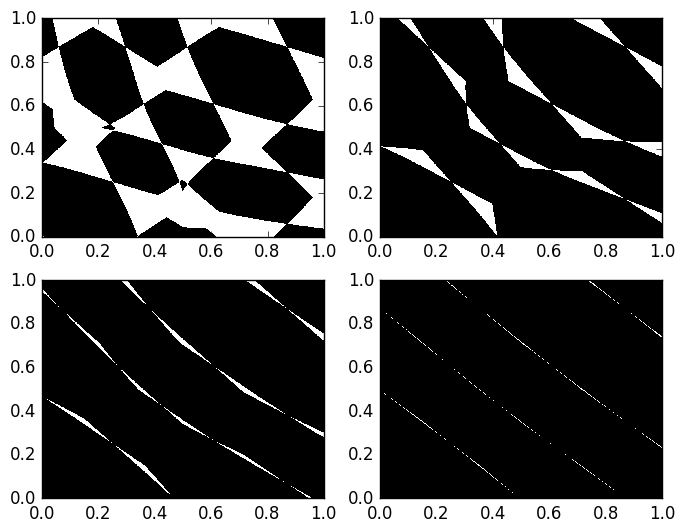

PyObject <matplotlib.collections.QuadMesh object at 0x3207e67b8>

In [5]:
# Finally, plot the results.

n2Dx = repmat(reshape(ngrid,1,N),N,1)

fix, axes = subplots(2,2)
axes[1,1][:pcolormesh](n2Dx, n2Dx', Z1, cmap = "Greys") 
axes[1,2][:pcolormesh](n2Dx, n2Dx', Z2, cmap = "Greys") 
axes[2,1][:pcolormesh](n2Dx, n2Dx', Z3, cmap = "Greys") 
axes[2,2][:pcolormesh](n2Dx, n2Dx', Z4, cmap = "Greys") 


